In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

## Wavelet Transform

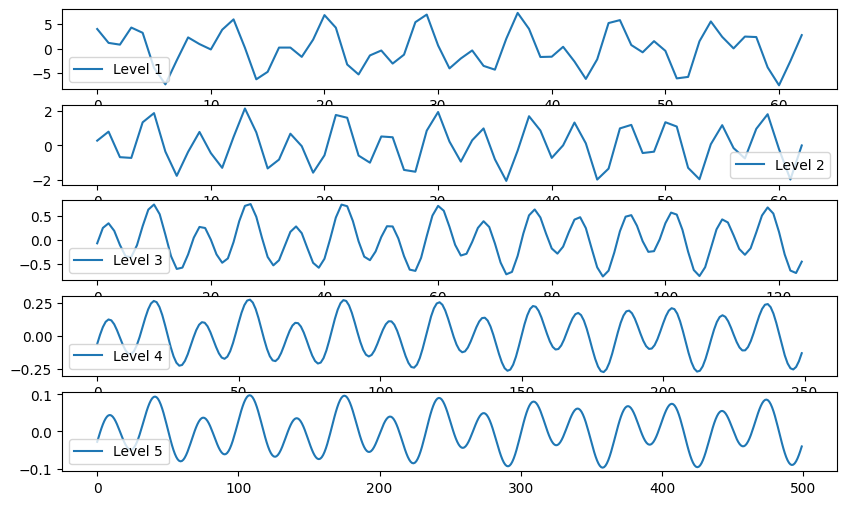

In [3]:
# Sample data
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 7 * t) + np.cos(2 * np.pi * 15 * t)

# wavelet transform
coeffs = pywt.wavedec(signal, 'db1', level=4)

# plot wavelet coefficients
plt.figure(figsize=(10, 6))
for i in range(len(coeffs)):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(coeffs[i], label=f'Level {i+1}')
    plt.legend()

plt.show()

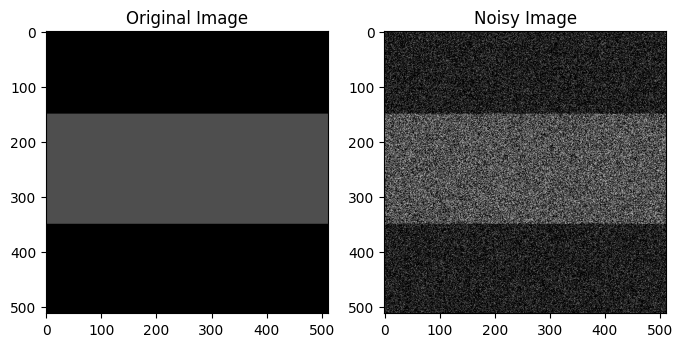

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 画像のサイズと輝度を指定
image_size = (512, 512)
brightness = 20000

# 16ビット画像を生成
image = np.full(image_size, brightness, dtype=np.uint16)
image[:150, :] = 0
image[350:, :] = 0

# ノイズの追加
noise = np.random.normal(loc=0, scale=50000, size=image_size).astype(np.int16)
noisy_image = np.clip(image + noise, 0, 65535).astype(np.uint16)

# 画像の表示
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=65535)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=65535)
plt.title('Noisy Image')

plt.show()
plt.imsave('./image/noise.png', noisy_image, cmap='gray')

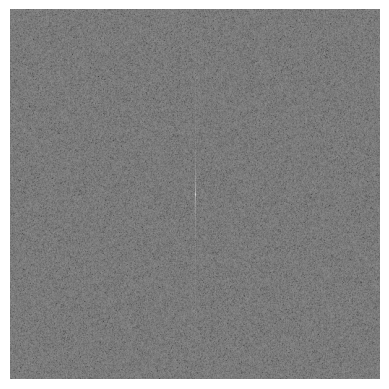

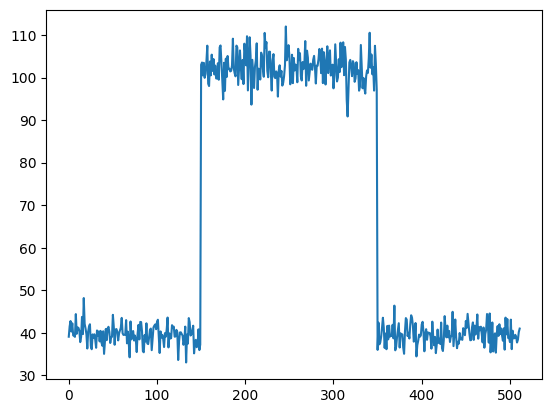

In [17]:
img = cv2.imread('./image/noise.png', cv2.IMREAD_ANYDEPTH)
fimg = np.fft.fft2(img)
fimg = np.fft.fftshift(fimg)
spec = 20 * np.log10(abs(fimg))

prof = [img[i, :].mean() for i in range(image_size[0])]

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(spec, cmap='gray')
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 511, 512), prof)

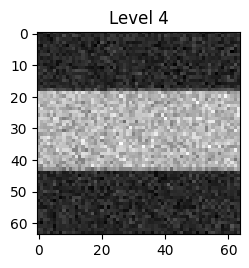

In [22]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import cv2

# 画像の読み込み
image = cv2.imread('./image/noise.png', cv2.IMREAD_ANYDEPTH)

# ウェーブレット変換
coeffs = pywt.wavedec2(img, 'haar', level=3)

# ウェーブレット係数の表示
plt.figure(figsize=(12, 6))
for i in range(1, len(coeffs)+1):
    plt.subplot(2, 4, 1)
    plt.imshow(coeffs[0], cmap='gray')
    plt.title(f'Level {i}')

# オリジナル画像の表示
# plt.subplot(2, 4, len(coeffs)+1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')

# plt.show()
